# jobflow

## Define workflow with jobflow

In [1]:
from jobflow import job, Flow

/srv/conda/envs/notebook/lib/python3.12/site-packages/paramiko/pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from cryptography.hazmat.primitives.ciphers.algorithms in 48.0.0.
  "cipher": algorithms.TripleDES,
/srv/conda/envs/notebook/lib/python3.12/site-packages/paramiko/transport.py:253: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from cryptography.hazmat.primitives.ciphers.algorithms in 48.0.0.
  "class": algorithms.TripleDES,


In [2]:
from python_workflow_definition.jobflow import write_workflow_json

In [3]:
from simple_workflow import (
    add_x_and_y as _add_x_and_y, 
    get_prod_and_div as _get_prod_and_div,
)

In [4]:
workflow_json_filename = "jobflow_simple.json"

In [5]:
add_x_and_y = job(_add_x_and_y)
get_prod_and_div = job(_get_prod_and_div, data=["prod", "div"])

In [6]:
obj = get_prod_and_div(x=1, y=2)

In [7]:
w = add_x_and_y(x=obj.output.prod, y=obj.output.div)

In [8]:
flow = Flow([obj, w])

In [9]:
write_workflow_json(flow=flow, file_name=workflow_json_filename)

In [10]:
!cat {workflow_json_filename}

{"nodes": [{"id": 0, "function": "simple_workflow.get_prod_and_div"}, {"id": 1, "function": "simple_workflow.add_x_and_y"}, {"id": 2, "value": 1}, {"id": 3, "value": 2}], "edges": [{"target": 0, "targetPort": "x", "source": 2, "sourcePort": null}, {"target": 0, "targetPort": "y", "source": 3, "sourcePort": null}, {"target": 1, "targetPort": "x", "source": 0, "sourcePort": "prod"}, {"target": 1, "targetPort": "y", "source": 0, "sourcePort": "div"}]}

## Load Workflow with aiida

In [11]:
from aiida import load_profile

load_profile()

Profile<uuid='9da6a68ed2b14ffb920b92aa0a616339' name='pwd'>

In [12]:
from python_workflow_definition.aiida import load_workflow_json

In [13]:
wg = load_workflow_json(file_name=workflow_json_filename)
wg

NodeGraphWidget(settings={'minimap': True}, style={'width': '90%', 'height': '600px'}, value={'name': 'WorkGra…

In [14]:
wg.run()

04/12/2025 11:27:56 AM <381> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [3|WorkGraphEngine|continue_workgraph]: tasks ready to run: get_prod_and_div1
04/12/2025 11:27:57 AM <381> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [3|WorkGraphEngine|update_task_state]: Task: get_prod_and_div1, type: PyFunction, finished.
04/12/2025 11:27:57 AM <381> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [3|WorkGraphEngine|continue_workgraph]: tasks ready to run: add_x_and_y2
04/12/2025 11:27:58 AM <381> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [3|WorkGraphEngine|update_task_state]: Task: add_x_and_y2, type: PyFunction, finished.
04/12/2025 11:27:58 AM <381> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [3|WorkGraphEngine|continue_workgraph]: tasks ready to run: 
04/12/2025 11:27:58 AM <381> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [3|WorkGraphEngine|finalize]: Fin

## Load Workflow with pyiron_base

In [16]:
from python_workflow_definition.pyiron_base import load_workflow_json

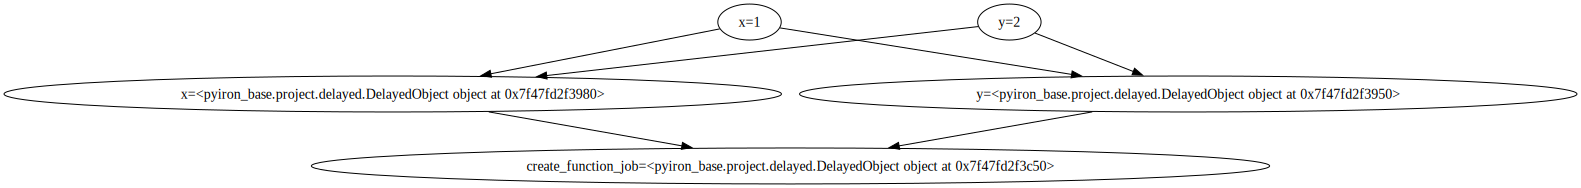

In [18]:
delayed_object_lst = load_workflow_json(file_name=workflow_json_filename)
delayed_object_lst[-1].draw()

In [19]:
delayed_object_lst[-1].pull()

The job get_prod_and_div_5e64acfa88dc01309cd4ba60143865e3 was saved and received the ID: 1
The job add_x_and_y_82c0f2025c97ddd328aaebe50fb30c48 was saved and received the ID: 2


2.5